In [42]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/{accelerator}/torch_nightly.html

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

In [ ]:
!pip uninstall fastai

In [43]:
from fastai import *
from fastai.vision import *

In [44]:
path = Path('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2'); path

PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2')

In [45]:
path

PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2')

In [46]:
os.listdir(path)

['train', '.ipynb_checkpoints', '.DS_Store', 'valid', 'test', 'models']

In [87]:
files = os.listdir(f'{path}/test')
files

['290e695d-de0a-4587-a586-8dd9fa0443b4.jpg',
 'cc434246-42c0-4a42-8b9a-713c92224e2b.jpg',
 '9dbfd634-2503-4ba1-ba46-72629fb082d5.jpg',
 '72a8aaab-708c-49d1-85ab-f992c40e14c9.jpg',
 '3b5da9ee-1910-49a8-8c33-0a40b21dec56.jpg',
 '958e9740-2ab0-40a2-a3d4-9ef877b32267.jpg',
 'f4b9af6c-be1e-43b5-9bf9-64d1e175c691.jpg',
 'b95a4cf8-2c56-4ef2-9f7f-ede1052d6c8c.jpg',
 '7d730ec0-d931-43ae-a030-ca5748365e48.jpg',
 '0e1e7b7c-d2b0-4aec-88fd-3fbc6b26b9ee.jpg',
 '356afae3-7b5a-4e5b-a459-7ec3dd66ad73.jpg',
 'b350375f-77da-4764-90bf-88e4cae2ce1b.jpg',
 'aaf4ad27-055e-489b-9f9f-9241cf8d293c.jpg',
 '3fc2cc70-863e-42d3-b447-8476643d2f4d.jpg',
 'bdac2d1a-d68c-47d6-a2fd-31a066e6b1f9.jpg',
 '46ea1e0b-36a4-4b25-a5b1-75d075a86242.jpg',
 'a9125e1f-0d28-4635-b311-b64f2f9cdcf6.jpg',
 'd1489ac9-ee6e-4ca1-bc8c-40365eaabe74.jpg',
 '2f65416c-1d61-49f5-b749-4839a5594cd8.jpg',
 '174d2dab-8c8e-449e-8901-2595b8f07842.jpg',
 '4ad20780-4aaf-48de-bd8c-671760a19532.jpg',
 'abcd1c44-e699-4c4e-9250-baca4fbc154a.jpg',
 '6f8fde56

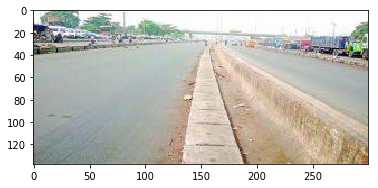

In [48]:
img = plt.imread(f'{path}/train/3/{files[0]}')
plt.imshow(img);

In [84]:
fnames = get_image_files(f'{path}/test')
fnames

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2/test/290e695d-de0a-4587-a586-8dd9fa0443b4.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2/test/cc434246-42c0-4a42-8b9a-713c92224e2b.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2/test/9dbfd634-2503-4ba1-ba46-72629fb082d5.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2/test/72a8aaab-708c-49d1-85ab-f992c40e14c9.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2/test/3b5da9ee-1910-49a8-8c33-0a40b21dec56.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2/test/958e9740-2ab0-40a2-a3d4-9ef877b32267.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2/test/f4b9af6c-be1e-43b5-9bf9-64d1e175c691.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2/test/b95a4cf8-2c56-4ef2-9f7f-ede1052d6c8c.jpg'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/dl1/train_2/test/

In [49]:
data = ImageDataBunch.from_folder(path, train='train', valid='valid', test='test', ds_tfms=get_transforms(), size=224, bs=64)

In [50]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [13]:
learn.fit_one_cycle(4)

Total time: 01:47
epoch  train_loss  valid_loss  error_rate
1      0.629509    0.248865    0.079365    (00:30)
2      0.395757    0.196581    0.068783    (00:25)
3      0.297594    0.203542    0.066138    (00:25)
4      0.225041    0.213688    0.079365    (00:25)



In [14]:
learn.save('stage-1')

In [15]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(1)

Total time: 00:37
epoch  train_loss  valid_loss  error_rate
1      0.471895    0.403032    0.129630    (00:37)



In [17]:
lrf=learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


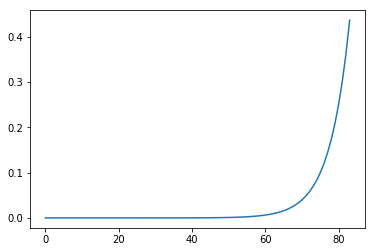

In [18]:
learn.recorder.plot_lr()

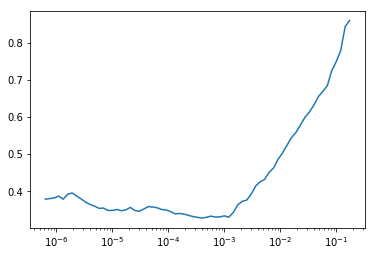

In [19]:
learn.recorder.plot()

In [20]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-2))

Total time: 01:12
epoch  train_loss  valid_loss  error_rate
1      0.308154    0.274375    0.111111    (00:36)
2      0.265121    0.205858    0.068783    (00:36)



In [51]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [24]:
learn.fit_one_cycle(4)

Total time: 03:53
epoch  train_loss  valid_loss  error_rate
1      0.446679    0.363648    0.084656    (01:10)
2      0.314070    0.249942    0.076720    (00:54)
3      0.219995    0.227690    0.068783    (00:54)
4      0.171165    0.222704    0.068783    (00:54)



In [25]:
learn.save('stage-1-50')

In [26]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-2))

Total time: 04:55
epoch  train_loss  valid_loss  error_rate
1      0.311841    0.591488    0.124339    (01:17)
2      0.322769    0.269138    0.097884    (01:12)
3      0.259917    0.196613    0.063492    (01:12)
4      0.196890    0.157263    0.055556    (01:12)



In [52]:
learn.load('stage-1-50')

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

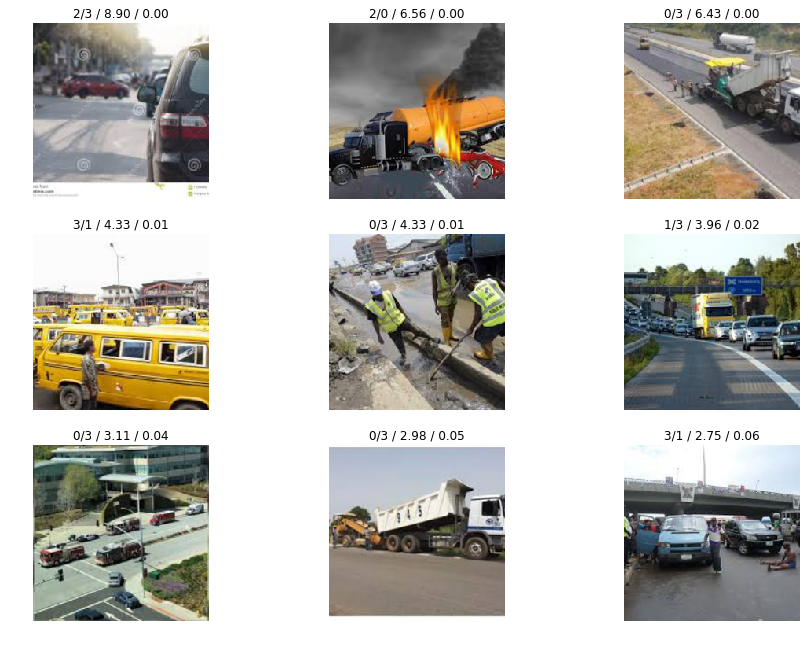

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

In [66]:
log_preds, y = learn.TTA(is_test=True)

Total time: 01:08



In [79]:
num_classes = len(data.classes)

In [80]:
num_classes

4

In [81]:
preds = np.argmax(log_preds, axis=1)

In [82]:
preds

tensor([0, 2, 1, 3, 3, 3, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 3, 0, 3, 0, 1, 2,
        2, 3, 3, 3, 2, 0, 2, 2, 3, 1, 1, 2, 3, 0, 3, 0, 1, 3, 1, 1, 0, 2, 0, 1,
        3, 1, 0, 2, 3, 1, 0, 1, 0, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0, 3, 2, 0, 3, 2,
        2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 2, 3, 0, 1, 3, 2, 1, 2, 3, 2,
        0, 1, 1, 1, 0, 3, 1, 3, 0, 0, 0, 1, 2, 3, 2, 1, 1, 2, 2, 0, 0, 3, 3, 3,
        1, 3, 0, 3, 2, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 3, 3, 0, 0, 3, 2, 2, 1, 0,
        2, 1, 0, 0, 0, 1, 0, 0, 3, 3, 1, 2, 1, 3, 1, 3, 3, 3, 0, 1, 1, 0, 1, 0,
        1, 0, 3, 2, 2, 2, 3, 3, 1, 1, 3, 3, 0, 3, 0, 0, 3, 3, 0, 2, 0, 0, 0, 3,
        2, 3, 2, 2, 2, 3, 2, 3, 1, 2, 3, 0, 0, 2, 1, 0, 2, 0, 3, 1, 3, 3, 2, 3,
        0, 0, 0, 2, 1, 0, 0, 0, 1, 3, 2, 2, 0, 2, 1, 3, 2, 3, 3, 1, 1, 3, 1, 0,
        1, 0, 0, 2, 1, 0, 3, 3, 2, 0, 3, 1, 3, 1, 2, 0, 0, 3, 1, 0, 0, 3, 0, 0,
        3, 3, 2, 3, 0, 1, 0, 3, 1, 2, 3, 0, 3, 1, 2, 1, 0, 0, 1, 3, 0, 1, 1, 1,
        3, 1, 1, 3, 2, 3, 2, 2, 1, 2, 0,

In [83]:
preds.shape

torch.Size([800])

In [21]:
probs.shape

torch.Size([800, 4])

In [89]:
my_submission = pd.DataFrame({'ImageID': files, 'Category': preds})
my_submission.to_csv('HackExpo2018.csv', index=False)